In [1]:
import pandas as pd#
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pldf = pd.read_csv("ppp1.csv", header=0)
pldf

,Agency,avg(CreateCloseDiff)
0,DOT,10.457643
1,HPD,12.876739
2,DCA,21.054759
3,DPR,87.632784
4,TLC,40.491213
5,EDC,52.987667
6,DOF,7.052786
7,NYPD,0.243282
8,DOB,65.081102
9,DFTA,5.149167


In [43]:
from matplotlib.backends.backend_pdf import PdfPages

BRONX
6    37689
Name: COUNTS, dtype: int64
BROOKLYN
14    58539
Name: COUNTS, dtype: int64
MANHATTAN
22    64268
Name: COUNTS, dtype: int64
QUEENS
30    35008
Name: COUNTS, dtype: int64
STATEN ISLAND
38    5484
Name: COUNTS, dtype: int64


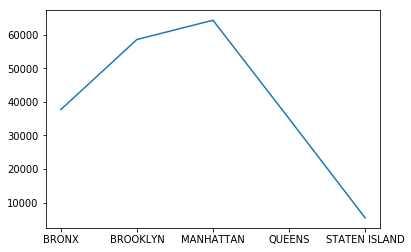

In [44]:
for borough in pldf["BOROUGH"].unique():
    print(borough)
    print(pldf[(pldf["BOROUGH"]==borough) & (pldf["YEAR"] == 2011)]["COUNTS"])
 
temp = pldf[pldf["YEAR"] == 2011]
plt.plot(temp["BOROUGH"], temp["COUNTS"])
plt.show()

In [45]:
pldf[pldf["BOROUGH"]==borough]

,COMPLAINT TYPE,BOROUGH,YEAR,COUNTS
32,Noise Complaint,STATEN ISLAND,2017,10795
33,Noise Complaint,STATEN ISLAND,2016,10554
34,Noise Complaint,STATEN ISLAND,2015,10186
35,Noise Complaint,STATEN ISLAND,2014,9115
36,Noise Complaint,STATEN ISLAND,2013,7129
37,Noise Complaint,STATEN ISLAND,2012,6516
38,Noise Complaint,STATEN ISLAND,2011,5484
39,Noise Complaint,STATEN ISLAND,2010,5805


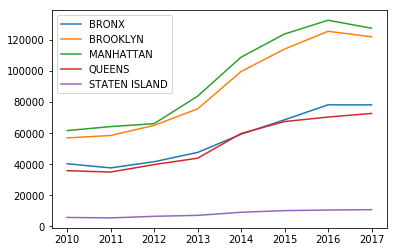

In [47]:

colorList =[]
for borough in pldf["BOROUGH"].unique():
    temp = pldf[pldf["BOROUGH"]==borough]
    plt.plot(temp["YEAR"], temp["COUNTS"])
    colorList.append(borough)

plt.legend(colorList, loc='upper left')
#pp = PdfPages("ww1_borough_complaint_Vs_Year.pdf")
#plt.savefig(pp, format="pdf")
plt.savefig("ppp1_borough_complaint_Vs_Year.png")
plt.show()

In [48]:
pldf = pd.read_csv("ppp3.csv", header=0)
pldf

,COUNTS,Year
0,643933,2017
1,682634,2016
2,665451,2015
3,625364,2014
4,547015,2013
5,529776,2012
6,510841,2011
7,360185,2010


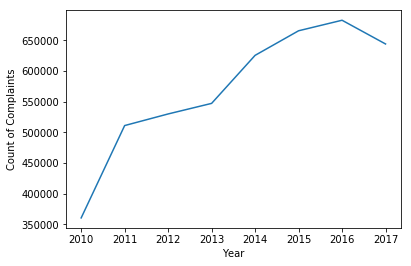

In [49]:
plt.plot(pldf["Year"], pldf["COUNTS"])
plt.xlabel('Year')
plt.ylabel('Count of Complaints')
plt.savefig("ww2_ComplaintCount_Vs_year.png")
plt.show()


In [82]:
pldf3 = pd.read_csv("ppp3.csv", header=0)
pldf4 = pd.read_csv("ppp4.csv", header=0)
pldf5 = pd.read_csv("ppp5.csv", header=0)
pldf6 = pd.read_csv("ppp6.csv", header=0)
pldf7 = pd.read_csv("ppp7.csv", header=0)

pldf_all = pldf3.merge(pldf4, on="Year", suffixes=('_BROOKLYN','_QUEENS')).merge(pldf5, on="Year", suffixes=('','_MANHATTAN')).merge(pldf6, on="Year", suffixes=('','_BRONX')).merge(pldf7, on="Year", suffixes=('','_STATEN_ISLAND'))

In [83]:
pldf_all.columns

Index(['COUNTS_BROOKLYN', 'Year', 'COUNTS_QUEENS', 'COUNTS', 'COUNTS_BRONX',
       'COUNTS_STATEN_ISLAND'],
      dtype='object')

In [84]:
pldf_all = pldf_all[['Year', 'COUNTS_BROOKLYN', 'COUNTS_QUEENS', 'COUNTS', 'COUNTS_BRONX', 'COUNTS_STATEN_ISLAND']]

In [85]:
pldf_all

,Year,COUNTS_BROOKLYN,COUNTS_QUEENS,COUNTS,COUNTS_BRONX,COUNTS_STATEN_ISLAND
0,2017,643933,409532,409532,378140,110102
1,2016,682634,499410,499410,428543,104717
2,2015,665451,459115,459115,403375,103716
3,2014,625364,419262,419262,385903,97022
4,2013,547015,372143,372143,338706,80666
5,2012,529776,344235,344235,329389,80364
6,2011,510841,321751,321751,300566,89005
7,2010,360185,251435,251435,183505,79475


In [98]:
colorList =[]
boroughList = pldf_all.columns[1:]
for borough in boroughList:
    plt.plot(pldf_all["Year"], pldf_all[borough])
    colorList.append(borough[7:])
    
plt.legend(colorList, loc='upper left')
plt.savefig("ppp3__top5_complaint_boroughwise.png")
plt.show()

KeyError: 'Month'

In [87]:
pldf10 

,Complaint counts for Queens,Complaint Type
0,72734,Noise Complaint
1,48761,Blocked Driveway
2,42099,Illegal Parking
3,28367,Street Condition
4,21489,HEAT/HOT WATER


/home/apurv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


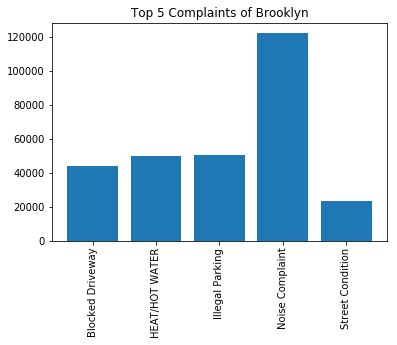

In [88]:
pldf8 = pd.read_csv("ppp8.csv", header=0).iloc[:, 1:]
plt.bar(pldf8.ix[:,1], pldf8.ix[:,0])
plt.title("Top 5 Complaints of Brooklyn")
plt.xticks(rotation='vertical')
plt.savefig("ppp8_top5_complaint_brooklyn.png")
plt.show()

In [89]:
pldf10 = pd.read_csv("ppp10.csv", header=0).iloc[:, 1:]
pldf10

,Complaint counts for Queens,Complaint Type
0,72734,Noise Complaint
1,48761,Blocked Driveway
2,42099,Illegal Parking
3,28367,Street Condition
4,21489,HEAT/HOT WATER


/home/apurv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


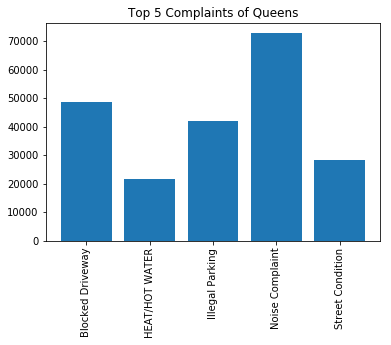

In [90]:
plt.bar(pldf10.ix[:,1], pldf10.ix[:,0])
plt.title("Top 5 Complaints of Queens")
plt.xticks(rotation='vertical')
plt.savefig("ppp10_top5_complaint_queens.png")
plt.show()

In [91]:
pldf13.head()

,STATUS,Counts
0,Open,39620
1,Unspecified,1
2,Unassigned,3
3,Draft,4
4,Started,117


In [92]:
pldf11 = pd.read_csv("ppp11.csv", header=0).iloc[:, 1:]
pldf11

,Complaint counts for Staten Island,Complaint Type
0,11043,Electronics Waste
1,10795,Noise Complaint
2,9316,Street Condition
3,7377,Illegal Parking
4,5870,Street Light Condition


/home/apurv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


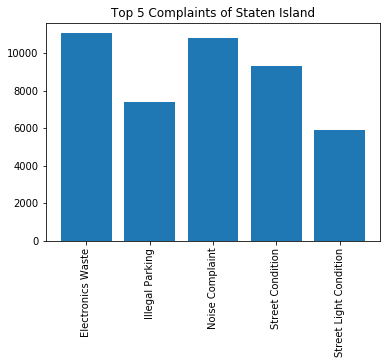

In [93]:
plt.bar(pldf11.ix[:,1], pldf11.ix[:,0])
plt.title("Top 5 Complaints of Staten Island")
plt.xticks(rotation='vertical')
plt.savefig("ppp11_top5_complaint_Staten_Island.png")
plt.show()

In [94]:
pldf12 = pd.read_csv("ppp12.csv", header=0).iloc[:, 1:]
pldf12

,Complaint counts for Bronx,Complaint Type
0,78258,Noise Complaint
1,50527,HEAT/HOT WATER
2,21953,Blocked Driveway
3,20511,UNSANITARY CONDITION
4,16597,PAINT/PLASTER


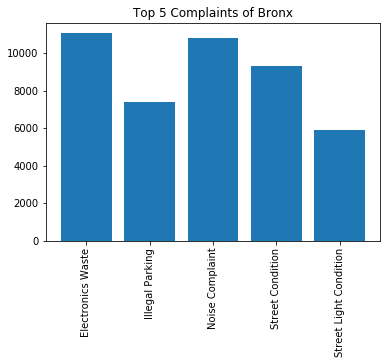

In [95]:
plt.bar(pldf11.ix[:,1], pldf11.ix[:,0])
plt.title("Top 5 Complaints of Bronx")
plt.xticks(rotation='vertical')
plt.savefig("ppp12_top5_complaint_bronx.png")
plt.show()

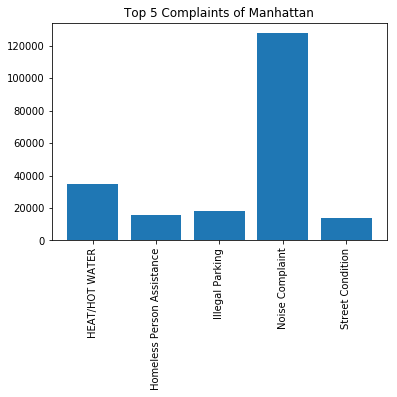

In [96]:
plt.bar(pldf9.ix[:,1], pldf9.ix[:,0])
plt.title("Top 5 Complaints of Manhattan")
plt.xticks(rotation='vertical')
plt.savefig("ppp9_top5_complaint_manhattan.png")
plt.show()

In [97]:
pldf13 = pd.read_csv("ppp13.csv", header=0)
pldf13

,STATUS,Counts
0,Open,39620
1,Unspecified,1
2,Unassigned,3
3,Draft,4
4,Started,117
5,Pending,362496
6,Closed,14182730
7,Assigned,27906


In [3]:
pldf = pd.read_csv("ddd1.csv", header=0)
pldf

,Agency,avg(CreateCloseDiff)
0,DOT,10.457643
1,HPD,12.876739
2,DCA,21.054759
3,DPR,87.632784
4,TLC,40.491213
5,EDC,52.987667
6,DOF,7.052786
7,NYPD,0.243282
8,DOB,65.081102
9,DFTA,5.149167


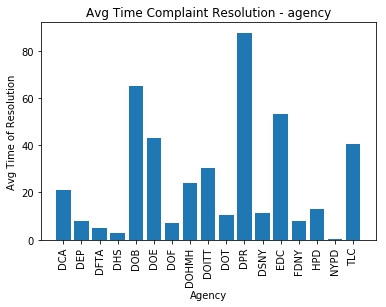

In [5]:
plt.bar(pldf.ix[:,0], pldf.ix[:,1])
plt.title("Avg Time Complaint Resolution - agency")
plt.xticks(rotation='vertical')
plt.xlabel('Agency')
plt.ylabel('Avg Time of Resolution')
plt.savefig("ddd1_agency_complaint.png")
plt.show()

In [48]:
pldf = pd.read_csv("ddd5.csv", header=0)
pldf.head(2)


,Agency,Complaint Type,avvg
0,DOB,Home Care Provider Complaint,0.0
1,DOHMH,LEAD,0.0


In [45]:
pldft = pldf.sort_values(['gg'], ascending=[0]).iloc[0:10, :]

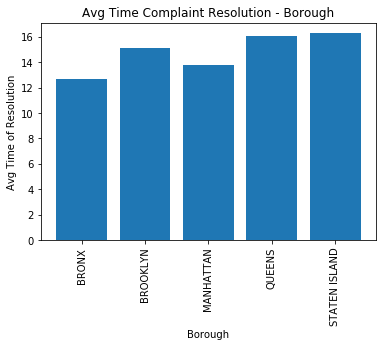

In [47]:
plt.bar(pldft.ix[:,0], pldft.ix[:,1])
plt.title("Avg Time Complaint Resolution - Borough")
plt.xticks(rotation='vertical')
plt.xlabel('Borough')
plt.ylabel('Avg Time of Resolution')
plt.savefig("ddd4_Borough_complaint.png")
plt.show()